In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('results/2024-10-07.csv')
results.columns = ['server_id', 'service_id', 'client_id', 'ground_truth', 'req_delay', 'req_acc', 'prediction', 'compute_time', 'probability', 'accuracy', 'total_qoe', 'accuracy_qoe', 'delay_qoe', 'cpu_power', 'model', 'start_time', 'end_time']

# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)
results['start_time'] = pd.to_datetime(results['start_time'])
results['end_time'] = pd.to_datetime(results['end_time'])

# get total_time in seconds
results['total_time'] = results['end_time'] - results['start_time']
results['total_time'] = results['total_time'].dt.total_seconds()
# results['total_time'] = results['total_time'].astype(str)

# convert power consumption from mW to W
results['cpu_power'] = results['cpu_power'] / 1000

results['daemon_overhead'] = results['total_time'] - results['compute_time']
results

,server_id,service_id,client_id,ground_truth,req_delay,req_acc,prediction,compute_time,probability,accuracy,total_qoe,accuracy_qoe,delay_qoe,cpu_power,model,start_time,end_time,total_time,daemon_overhead
0,d2iedgeai3,imagenet_image_classification,raspi-1,abacus,0.051,0.849,abacus,3.063544,0.999989,1,0.432828,0.849009,0.016647,157.552,resnet152,2024-10-08 13:26:44.060,2024-10-08 13:26:47.317,3.257,0.193456
1,d2iedgeai3,imagenet_image_classification,raspi-1,abaya,0.050,0.849,abaya,2.815943,0.999431,1,0.433620,0.849484,0.017756,147.488,resnet152,2024-10-08 13:26:48.478,2024-10-08 13:26:52.529,4.051,1.235057
2,d2iedgeai3,imagenet_image_classification,raspi-1,academic_gown,0.052,0.850,crutch,2.707460,0.487761,0,0.509603,1.000000,0.019206,137.856,resnet152,2024-10-08 13:26:52.788,2024-10-08 13:26:56.258,3.470,0.762540
3,d2iedgeai3,imagenet_image_classification,raspi-1,accordion,0.050,0.851,accordion,2.876748,0.943654,1,0.459597,0.901813,0.017381,148.000,resnet152,2024-10-08 13:26:56.508,2024-10-08 13:27:00.431,3.923,1.046252
4,d2iedgeai3,imagenet_image_classification,raspi-1,acorn,0.050,0.849,acorn,2.864664,0.999717,1,0.433347,0.849241,0.017454,147.736,resnet152,2024-10-08 13:27:00.523,2024-10-08 13:27:04.527,4.004,1.139336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,d2iedgeai3,imagenet_image_classification,raspi-1,brassiere,0.050,0.849,brassiere,6.778888,0.621036,1,0.503688,1.000000,0.007376,188.352,resnext50_32x4d,2024-10-08 15:15:48.481,2024-10-08 15:16:03.878,15.397,8.618112
860,d2iedgeai3,imagenet_image_classification,raspi-1,breakwater,0.050,0.849,breakwater,11.739594,0.931036,1,0.458073,0.911887,0.004259,234.592,resnext50_32x4d,2024-10-08 15:16:04.102,2024-10-08 15:16:29.004,24.902,13.162406
861,d2iedgeai3,imagenet_image_classification,raspi-1,breastplate,0.050,0.850,cuirass,7.721151,0.852925,0,0.501523,0.996571,0.006476,188.296,resnext50_32x4d,2024-10-08 15:16:29.210,2024-10-08 15:16:42.490,13.280,5.558849
862,d2iedgeai3,imagenet_image_classification,raspi-1,briard,0.050,0.849,briard,7.729649,0.982792,1,0.435167,0.863865,0.006469,163.032,resnext50_32x4d,2024-10-08 15:16:42.623,2024-10-08 15:17:00.675,18.052,10.322351


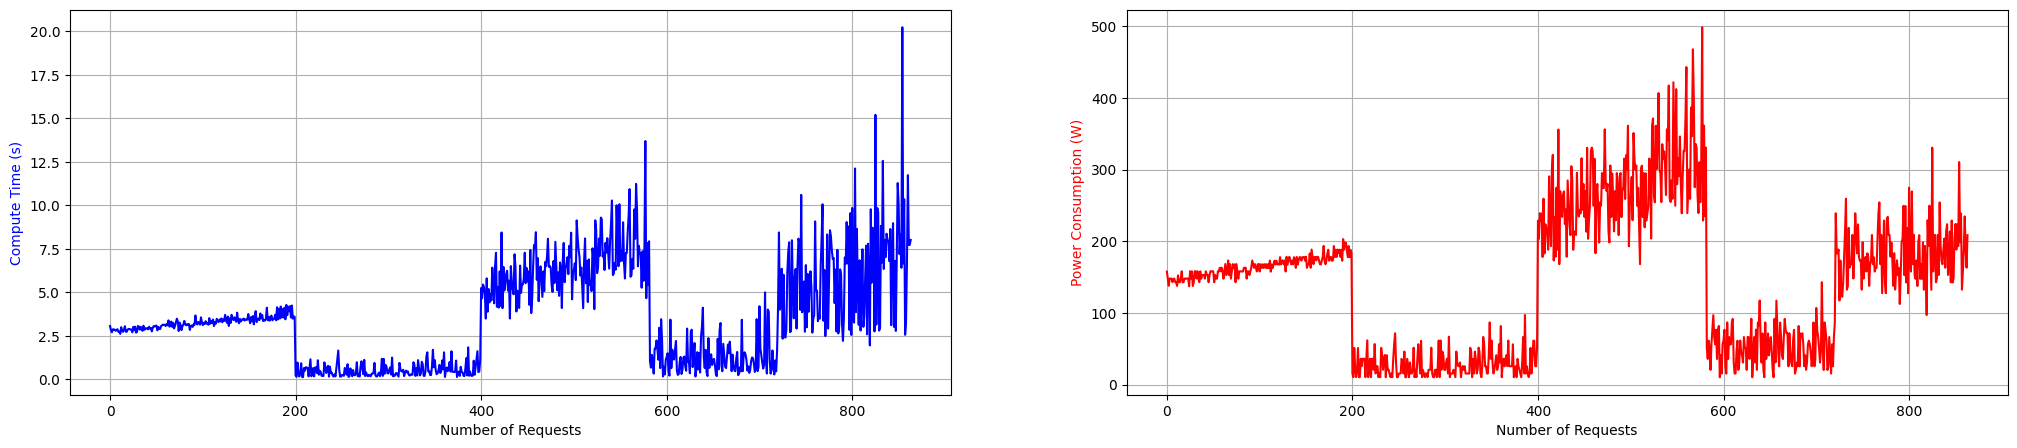

In [218]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5), sharex=True)

# Plotting Compute Time
ax1.plot(results['compute_time'], color='blue')
ax1.set_ylabel('Compute Time (s)', color='blue')
ax1.set_xlabel('Number of Requests')
ax1.grid(True)

# Plotting Power Consumption
ax2.plot(results['cpu_power'], color='red')
ax2.set_xlabel('Number of Requests')
ax2.set_ylabel('Power Consumption (W)', color='red')
ax2.grid(True)

# Show the combined plot
plt.show()

In [219]:
summary = results.groupby('model')[['accuracy', 'compute_time', 'cpu_power']].mean()
summary.columns = ['Mean Accuracy', 'Mean Compute Time (s)', 'Mean Power Consumption (W)']
summary

,Mean Accuracy,Mean Compute Time (s),Mean Power Consumption (W)
model,,,
densenet201,0.917582,6.473909,275.840440
mobilenet_v3_small,0.834532,1.304417,52.435511
resnet152,0.915000,3.260420,164.375960
resnext50_32x4d,0.951049,6.084733,183.219636
shufflenet_v2_x0_5,0.695000,0.518807,28.068040


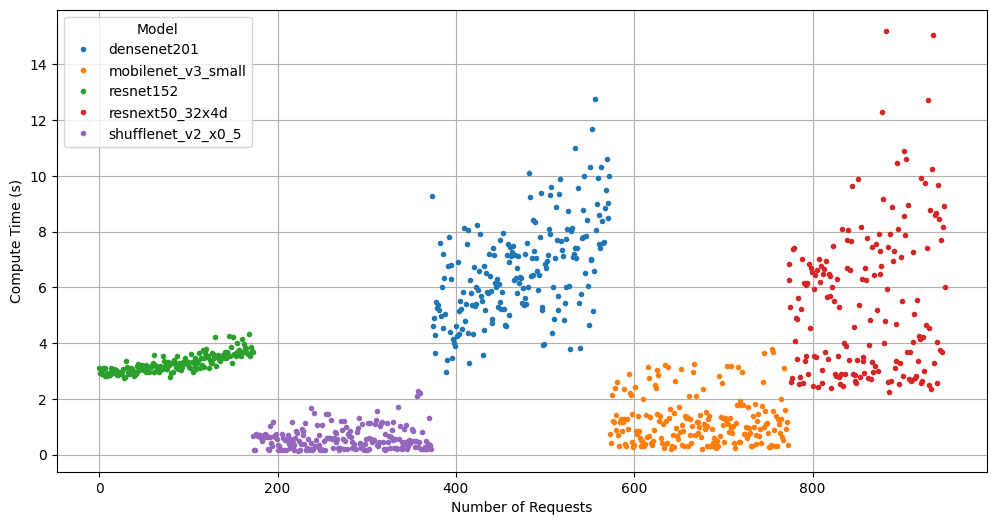

In [118]:
# Plot the data with different colors for each model
plt.figure(figsize=(12, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (s)')

plt.grid(True)
plt.legend(title='Model', loc="best")
plt.show()

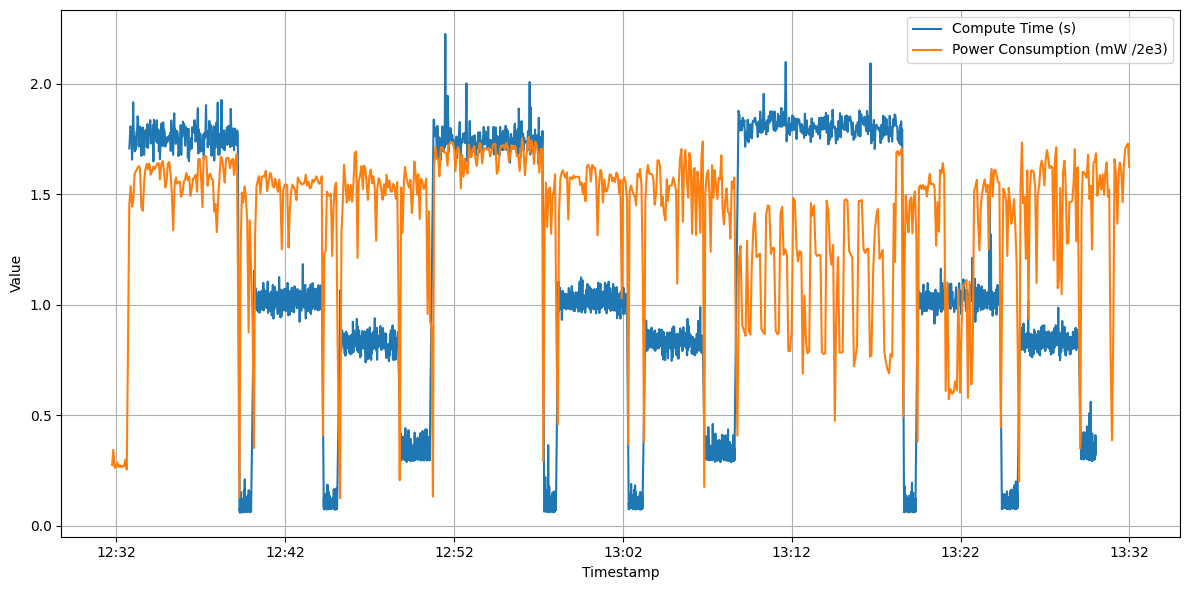

In [148]:
# Plot the data
plt.style.use('default')
plt.figure(figsize=(12, 6), facecolor='white')

plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'][10:], power['cpu_avg_milliwatt'][10:]/2e3, label='Power Consumption (mW /2e3)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()